In [123]:
import os

In [124]:
labels = ['Ben_Affleck','Elton_John','Jerry_Seinfeld','Madonna','Mindy_Kaling']

In [125]:
out_path = 'OUTPUT'
in_path = 'INPUT'

In [126]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [127]:
model = load_model('model/facenet_keras.h5')

In [128]:
model.load_weights('model/facenet_keras_weights.h5')

In [129]:
#Importing the data and augmenting it:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.15,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(160, 160),
        class_mode='categorical')


valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
        'data/val',
        target_size=(160, 160),
        class_mode='categorical')

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [130]:
import tensorflow as tf 
from tensorflow.keras.layers import Flatten, Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
model = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [132]:
for layer in model.layers:
    layer.trainable = False

In [134]:
# Adding the output layers to the base model
l1 = Flatten()(model.layers[-1].output)
l2 = Dense(512, activation='elu')(l1)
l3 = Dropout(0.25)(l2)
l4 = Dense(128, activation='elu')(l3)
l5 = Dropout(0.25)(l4)
l6 = Dense(64, activation='elu')(l5)
l7 = Dropout(0.25)(l6)
l8 = Dense(5, activation='softmax')(l7)

new_model = tf.keras.Model(inputs=model.inputs, outputs = l8)

In [135]:
# Compiling the model i.e selecting the optimizer and loss function

new_model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics = ['acc'])

In [136]:
# training the model
# regularization
history = new_model.fit(
      train_generator,
      steps_per_epoch=3,
      validation_data=(valid_generator),
      epochs=30,
      verbose=1)

Epoch 1/30
3/3 [==============================] - 12s 2s/step - loss: 2.0974 - acc: 0.2458 - val_loss: 1.8165 - val_acc: 0.3200
Epoch 2/30
3/3 [==============================] - 4s 1s/step - loss: 1.8453 - acc: 0.3060 - val_loss: 1.7213 - val_acc: 0.4000
Epoch 3/30
3/3 [==============================] - 4s 1s/step - loss: 1.8332 - acc: 0.3237 - val_loss: 1.6221 - val_acc: 0.4800
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 1.9881 - acc: 0.2571 - val_loss: 1.5077 - val_acc: 0.4800
Epoch 5/30
3/3 [==============================] - 4s 1s/step - loss: 1.8376 - acc: 0.2282 - val_loss: 1.4020 - val_acc: 0.4800
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 1.6218 - acc: 0.3826 - val_loss: 1.3384 - val_acc: 0.4800
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 1.5123 - acc: 0.3752 - val_loss: 1.3085 - val_acc: 0.4800
Epoch 8/30
3/3 [==============================] - 4s 1s/step - loss: 1.5648 - acc: 0.3511 - val_loss: 1.2659 -

In [137]:
new_model.save('./new_model/model.h5')
new_model.save_weights('./new_model/model_weights.h5')

In [138]:
import tensorflow as tf
from tensorflow.keras.models import load_model
new_model = load_model('./new_model/model.h5')
new_model.load_weights('./new_model/model_weights.h5')


In [139]:
from tensorflow.keras.preprocessing import image
import numpy as np
labels = ['Ben_Affleck','Elton_John','Jerry_Seinfeld','Madonna','Mindy_Kaling']
out_path = 'OUTPUT'
in_path = 'INPUT'
file_list= os.listdir(in_path)
classifier = []
for fil in file_list:
    test_image = image.load_img(os.path.join(in_path,fil), target_size = (160, 160))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    print(np.argmax(new_model.predict(test_image)))

2
2
2
2
2
2
2
4
2
4
2
2
4
2
4
2
2
2
2
4
2
2
2
4
4
4
2
2
4
4
4
4
4
4
2
4
4
2
4
2
2
4
4
4
2
4
2
4
4
4
2
2
2
2
4
4
2
2
2
4
2
2
2
4
4
2
2
2
4
4
4
4
2
2
4
2
2
2
4
4
2
2
4
2
2
2
4
4
4
4
2
4
4
4
4
4
2
4
2
4
2
2
2
2
2
2
2
2
2
2
4
4
4
4
2
2
4
4


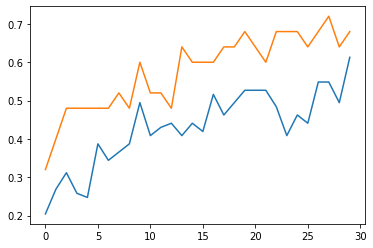

In [140]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])